In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('./x_c1.csv',header=None)
df1 = pd.read_csv('./x_c2.csv',header=None)

In [3]:
n_sample = 20
x_c1 = df.to_numpy()
x_c2 = df1.to_numpy()
 
x_c1 = np.hstack((np.ones((n_sample,1)),x_c1))
x_c2 = np.hstack((np.ones((n_sample,1)),x_c2))

y1 = np.ones((n_sample,1))*-1
y2 = np.ones((n_sample,1))

x = np.vstack((x_c1,x_c2))
y = np.vstack((y1,y2))

w = np.random.rand(1,3)

In [4]:
def drawData(x_c1,x_c2):
    plt.plot(x_c1[:,1], x_c1[:,2], '+b') 
    plt.plot(x_c2[:,1], x_c2[:,2], 'or')

def drawLine(w, col):    
    x = [-5,0.1,10]
    y = -w[0][0]/w[0][2]-np.multiply(w[0][1]/w[0][2],x)
    plt.plot(x, y, col)
    
    
def drawDataHyperplane(x_c1, x_c2, w, col):
    drawData(x_c1, x_c2)
    drawLine(w, col)

In [5]:
def Perceptron_mis_yx(y, x, w, n_epoch, eta):
    n_sample = int(len(y)/2)
    x_c1 = x[:n_sample, :]
    x_c2 = x[n_sample:2*n_sample, :]
    y = np.tile(y,(1,3))
    yx = np.multiply(y,x)

    print('----- Perceptron_mis_yx() started -----')
    for e in range(n_epoch):
        wyx = np.dot(yx,np.transpose(w))
        yx_misclassified = yx[wyx[:,0]<0,:]
        w = w+yx_misclassified.sum(axis=0)
        err = (wyx[:,0] < 0).sum(axis=0)

        plt.xlim([-5,10])
        plt.ylim([-5,10])
        drawDataHyperplane(x_c1, x_c2, w, 'k')
        print('err = %d' %(err))
        if err == 0:
            break
            
    return e

In [6]:
def Perceptron_l2(y, x, w, n_epoch, eta):
    n_sample = int(len(y)/2)
    x_c1 = x[:n_sample, :]
    x_c2 = x[n_sample:2*n_sample, :]
    
    print('----- Perceptron_l2() started -----')
    for e in range(n_epoch):
        wx = np.dot(x,np.transpose(w))
        diff = np.multiply(np.tile((y-wx),(1,3)),x)
        w=w+eta*diff.sum(axis=0)

        err1 = (1/2)*np.sum((y-wx)**2,axis=0)
        err2 = (np.multiply(y,wx)<0).sum(axis=0)
        print('err(%d) = %f %d' %(e+1,err1,err2))
        
        plt.xlim([-5,10])
        plt.ylim([-5,10])
        drawDataHyperplane(x_c1, x_c2, w, 'k')
        if err2 == 0:
            break
            
    return e

In [7]:
def SVM(y,x,w,n_epoch,eta):
    lamda = 0.01
    n_sample = int(len(y)/2)
    x_c1 = x[:n_sample, :]
    x_c2 = x[n_sample:2*n_sample, :]
    
    y = np.tile(y,(1,3))
    yx = np.multiply(y,x)
    for e in range(n_epoch):
        wyx = np.dot(yx,np.transpose(w))
    
        err_idx = wyx[:,0]<1
        w = w + eta*(-2*lamda*w*(n_sample*2) + yx[err_idx,:].sum(axis=0))

     
        err1 = err_idx.sum(axis=0)
        err2 = wyx[err_idx,:].sum(axis=0)
        print('err(%d) = %f %f, w= %f %f %f, |w|=%f, |w23|=%f' %(e+1, err1, err2,w[0][0],w[0][1],w[0][2],
                                                                 np.sqrt(np.sum(w**2,axis=1)),
                                                                 np.sqrt(np.sum(w[:,1:2]**2,axis=1))))
        plt.xlim([-5,10])
        plt.ylim([-5,10])
        drawDataHyperplane(x_c1, x_c2, w, 'k')

----- Perceptron_mis_yx() started -----
err = 12
err = 27
err = 12
err = 11
err = 10
err = 9
err = 3
err = 2
err = 2
err = 0


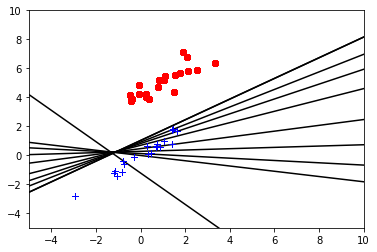

In [8]:
n_epoch = 100
eta = 0.001

ret1 = Perceptron_mis_yx(y, x, w, n_epoch, eta)

----- Perceptron_l2() started -----
err(1) = 236.008738 12
err(2) = 48.499145 12
err(3) = 20.546887 12
err(4) = 15.975560 12
err(5) = 14.846242 12
err(6) = 14.238821 12
err(7) = 13.725012 12
err(8) = 13.241398 12
err(9) = 12.778019 12
err(10) = 12.332769 11
err(11) = 11.904722 11
err(12) = 11.493149 11
err(13) = 11.097379 10
err(14) = 10.716774 10
err(15) = 10.350722 9
err(16) = 9.998638 9
err(17) = 9.659963 9
err(18) = 9.334161 8
err(19) = 9.020721 6
err(20) = 8.719151 5
err(21) = 8.428981 5
err(22) = 8.149762 5
err(23) = 7.881061 5
err(24) = 7.622467 3
err(25) = 7.373582 3
err(26) = 7.134027 3
err(27) = 6.903440 3
err(28) = 6.681470 3
err(29) = 6.467784 3
err(30) = 6.262062 3
err(31) = 6.063994 3
err(32) = 5.873288 3
err(33) = 5.689659 3
err(34) = 5.512836 2
err(35) = 5.342559 2
err(36) = 5.178577 1
err(37) = 5.020650 0


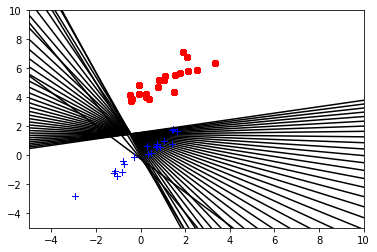

In [9]:
n_epoch = 100
eta = 0.001

ret2 = Perceptron_l2(y, x, w, n_epoch, eta)

err(1) = 15.000000 -16.486015, w= 0.186963 0.571295 0.849880, |w|=1.040975, |w23|=0.571295
err(2) = 15.000000 -16.074294, w= 0.171814 0.561642 0.839767, |w|=1.024778, |w23|=0.561642
err(3) = 15.000000 -15.662904, w= 0.156676 0.551997 0.829663, |w|=1.008756, |w23|=0.551997
err(4) = 15.000000 -15.251842, w= 0.141551 0.542359 0.819567, |w|=0.992915, |w23|=0.542359
err(5) = 15.000000 -14.841109, w= 0.126438 0.532730 0.809479, |w|=0.977263, |w23|=0.532730
err(6) = 15.000000 -14.430704, w= 0.111337 0.523108 0.799399, |w|=0.961809, |w23|=0.523108
err(7) = 15.000000 -14.020628, w= 0.096248 0.513493 0.789328, |w|=0.946561, |w23|=0.513493
err(8) = 15.000000 -13.610880, w= 0.081171 0.503887 0.779264, |w|=0.931527, |w23|=0.503887
err(9) = 15.000000 -13.201460, w= 0.066106 0.494288 0.769208, |w|=0.916718, |w23|=0.494288
err(10) = 15.000000 -12.792367, w= 0.051053 0.484696 0.759160, |w|=0.902143, |w23|=0.484696
err(11) = 15.000000 -12.383602, w= 0.036012 0.475113 0.749121, |w|=0.887812, |w23|=0.4751

err(141) = 6.000000 5.046030, w= -1.145878 -0.468630 0.589837, |w|=1.371334, |w23|=0.468630
err(142) = 6.000000 5.060110, w= -1.146961 -0.471154 0.591755, |w|=1.373929, |w23|=0.471154
err(143) = 6.000000 5.074179, w= -1.148043 -0.473676 0.593672, |w|=1.376524, |w23|=0.473676
err(144) = 6.000000 5.088236, w= -1.149125 -0.476196 0.595588, |w|=1.379121, |w23|=0.476196
err(145) = 6.000000 5.102282, w= -1.150206 -0.478713 0.597501, |w|=1.381719, |w23|=0.478713
err(146) = 6.000000 5.116317, w= -1.151285 -0.481229 0.599414, |w|=1.384318, |w23|=0.481229
err(147) = 6.000000 5.130341, w= -1.152364 -0.483743 0.601324, |w|=1.386918, |w23|=0.483743
err(148) = 6.000000 5.144353, w= -1.153443 -0.486255 0.603234, |w|=1.389520, |w23|=0.486255
err(149) = 6.000000 5.158354, w= -1.154520 -0.488765 0.605141, |w|=1.392122, |w23|=0.488765
err(150) = 5.000000 4.171639, w= -1.156596 -0.491657 0.603175, |w|=1.394009, |w23|=0.491657
err(151) = 6.000000 5.180183, w= -1.157671 -0.494163 0.605083, |w|=1.396612, |w2

err(281) = 3.000000 2.599062, w= -1.241411 -0.610653 0.673759, |w|=1.538814, |w23|=0.610653
err(282) = 3.000000 2.600446, w= -1.241418 -0.611524 0.674005, |w|=1.539273, |w23|=0.611524
err(283) = 3.000000 2.601830, w= -1.241425 -0.612394 0.674251, |w|=1.539732, |w23|=0.612394
err(284) = 3.000000 2.603212, w= -1.241431 -0.613263 0.674497, |w|=1.540192, |w23|=0.613263
err(285) = 3.000000 2.604594, w= -1.241438 -0.614132 0.674743, |w|=1.540651, |w23|=0.614132
err(286) = 3.000000 2.605974, w= -1.241445 -0.615000 0.674988, |w|=1.541110, |w23|=0.615000
err(287) = 3.000000 2.607353, w= -1.241452 -0.615867 0.675233, |w|=1.541569, |w23|=0.615867
err(288) = 3.000000 2.608731, w= -1.241459 -0.616733 0.675478, |w|=1.542028, |w23|=0.616733
err(289) = 3.000000 2.610108, w= -1.241466 -0.617599 0.675723, |w|=1.542487, |w23|=0.617599
err(290) = 3.000000 2.611484, w= -1.241472 -0.618464 0.675968, |w|=1.542947, |w23|=0.618464
err(291) = 3.000000 2.612859, w= -1.241479 -0.619329 0.676212, |w|=1.543406, |w2

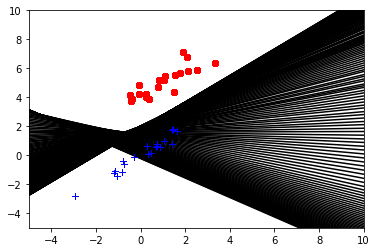

In [10]:
n_epoch = 300
eta = 0.001
ret3 = SVM(y, x, w, n_epoch, eta)